In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium

from matplotlib import font_manager, rc

plt.rc('font', family='Malgun Gothic')
#세계 코로나 현황
df_covid_case=pd.read_csv('../datas/covid_worldwide.csv')
df_covid_case = df_covid_case.replace(',', '',regex=True)
df_covid_case.drop(['Serial Number','Active Cases'], axis=1, inplace=True)
df_covid_case['Total Cases']=df_covid_case['Total Cases'].astype(int)
df_covid_case=df_covid_case.sort_values('Country')
list_c=df_covid_case['Country'].unique()

In [2]:
#나라 경위도
df_world_map=pd.read_excel('../datas/worldcities.xlsx',engine='openpyxl')
df_world_map=df_world_map[['country','lat','lng']]
df_world_map=df_world_map.drop_duplicates(['country'])
df_world_map=df_world_map.reset_index(drop=True)
df_world_map=df_world_map.sort_values('country')
df_world_map=df_world_map.rename(columns={'country':'Country'})
df_world_map=df_world_map.sort_values('Country')
list_m=df_world_map['Country'].unique()

In [3]:
#나라이름 통일전 안맞는거확인
slist_c=pd.Series(list_c)
slist_m=pd.Series(list_m)
concat_countries=pd.concat([slist_c,slist_m],axis=1)

pd.set_option('display.max_columns', None) ## 모든 열 출력
pd.set_option('display.max_rows', None) ## 모든 행 출력
contry_list = list(concat_countries[1])

for row in concat_countries.index:
    if concat_countries.loc[row,0] in contry_list:
        concat_countries.loc[row,0] = np.NaN
concat_countries.sort_values(0).head(40)

,0,1
6,Antigua and Barbuda,Anguilla
13,Bahamas,Azerbaijan
24,Bosnia and Herzegovina,Bosnia And Herzegovina
32,CAR,Cabo Verde
37,Caribbean Netherlands,Central African Republic
40,Channel Islands,China
45,Congo,Congo (Kinshasa)
53,DPRK,Côte d'Ivoire
54,DRC,Denmark
56,Diamond Princess,Dominica


In [4]:
#나라이름 통일
df_world_map['Country'].replace('United States', 'USA', inplace=True)
df_world_map['Country'].replace('United Kingdom', 'UK', inplace=True)
df_world_map['Country'].replace('South Korea', 'S. Korea', inplace=True)
df_world_map['Country'].replace('Antigua And Barbuda', 'Antigua and Barbuda', inplace=True)
df_world_map['Country'].replace('Congo (Brazzaville)', 'Congo', inplace=True)
df_world_map['Country'].replace('Macau', 'Macao', inplace=True)


In [5]:
#경위도와 세계코로나현황 합친거
merged_df = pd.merge(df_covid_case,df_world_map,how='inner',on='Country')
merged_df.head()

,Country,Total Cases,Total Deaths,Total Recovered,Total Test,Population,lat,lng
0,Afghanistan,208545,7882,186088,1188898,40754388,34.5328,69.1658
1,Albania,334167,3595,328951,1941032,2866374,41.3300,19.8200
2,Algeria,271378,6881,182749,230861,45350148,36.7764,3.0586
3,Andorra,47839,165,47563,249838,77463,42.5000,1.5000
4,Angola,105184,1931,103216,1499795,35027343,-8.8383,13.2344


In [6]:
#코로나 발생현황을 지도에 표시

merged_df.head()
merged_df.rename(columns={'Country' : '국가명', 'Total Cases' : '확진수',
                        'Total Deaths' : '사망수', 'Total Recovered' : '회복수',
                       'Total Test': '검사수', 'Population' : '인구','lat':'위도','lng':'경도'},inplace=True)

merged_df

,국가명,확진수,사망수,회복수,검사수,인구,위도,경도
0,Afghanistan,208545,7882,186088,1188898,40754388,34.5328,69.1658
1,Albania,334167,3595,328951,1941032,2866374,41.3300,19.8200
2,Algeria,271378,6881,182749,230861,45350148,36.7764,3.0586
3,Andorra,47839,165,47563,249838,77463,42.5000,1.5000
4,Angola,105184,1931,103216,1499795,35027343,-8.8383,13.2344
5,Anguilla,3904,12,3879,51382,15230,18.2167,-63.0500
6,Antigua and Barbuda,9106,146,8954,18901,99509,17.1211,-61.8447
7,Argentina,10037135,130421,9877032,35716069,46010234,-34.5997,-58.3819
8,Armenia,446008,8717,435162,3242901,2971966,40.1814,44.5144
9,Aruba,43993,236,42438,177885,107609,12.5186,-70.0358


In [7]:
from folium import CircleMarker
world_map1=folium.Map(location=[0,0],zoom_start=1.5,tiles='stamen Toner')

# 데이터프레임에서 위도와 경도 열 추출
locations = merged_df[['위도', '경도']].values.tolist()

# 총 확진자 수 열 추출
cases = merged_df['확진수'].tolist()

# 최대 총 확진자 수 계산
max_cases = max(cases)

# CircleMarker를 사용하여 총 확진자 수에 따라 크기가 다른 원을 지도에 추가
for location, case in zip(locations, cases):
    CircleMarker(
        location=location,
        radius=case / max_cases * 50,  # 원의 크기는 최대 50으로 설정
        color='#cc0000',
        fill=True,
        fill_color='#800000',
    ).add_to(world_map1)
world_map1

In [8]:
world_map=folium.Map(location=[0,0],zoom_start=1.5,tiles='stamen Toner')
from folium.plugins import HeatMap
HeatMap(
    data=merged_df[['위도', '경도','확진수']], 
    radius=20,
).add_to(world_map)




world_map

In [16]:
#계산하기위해서 intiger로 변경
merged_df=merged_df.dropna()
merged_df.loc[:,['사망수','회복수','검사수','인구']] = merged_df[['사망수','회복수','검사수','인구']].astype(int)


In [17]:
merged_df['검사비율']=(merged_df['검사수']/merged_df['인구'])
merged_df['사망률']=(merged_df['사망수']/merged_df['확진수'])
merged_df

,확진수,사망수,회복수,검사수,인구,위도,경도,검사비율,사망률
국가명,,,,,,,,,
Argentina,10037135,130421,9877032,35716069,46010234,-34.5997,-58.3819,0.776264,0.012994
Australia,11295446,18615,11235771,78835048,26068792,-33.8650,151.2094,3.024116,0.001648
Austria,5780229,21689,5730189,211273524,9066710,48.2083,16.3725,23.302116,0.003752
Azerbaijan,827944,10085,817654,7487550,10300205,40.3667,49.8352,0.726932,0.012181
Bahrain,700452,1543,698400,10682444,1783983,26.2250,50.5775,5.987974,0.002203
Bangladesh,2037556,29442,1992694,15247014,167885689,23.7289,90.3944,0.090818,0.014450
Belarus,994037,7118,985592,13646641,9432800,53.9022,27.5618,1.446722,0.007161
Belgium,4691499,33557,4644681,36548544,11668278,50.8353,4.3314,3.132300,0.007153
Brazil,36824580,697074,35919372,63776166,215353593,-23.5504,-46.6339,0.296146,0.018930


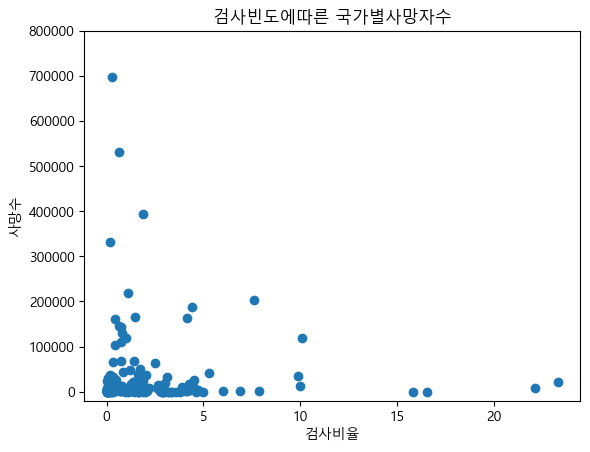

In [11]:
plt.scatter(merged_df['검사비율'], merged_df['사망수'])
plt.title('검사빈도에따른 국가별사망자수')
plt.xlabel('검사비율')
plt.ylabel('사망수')
plt.ylim(-20000,800000)
plt.show()

In [18]:
merged_df = merged_df[merged_df['검사수']>=6386235]
merged_df

,확진수,사망수,회복수,검사수,인구,위도,경도,검사비율,사망률
국가명,,,,,,,,,
Argentina,10037135,130421,9877032,35716069,46010234,-34.5997,-58.3819,0.776264,0.012994
Australia,11295446,18615,11235771,78835048,26068792,-33.8650,151.2094,3.024116,0.001648
Austria,5780229,21689,5730189,211273524,9066710,48.2083,16.3725,23.302116,0.003752
Azerbaijan,827944,10085,817654,7487550,10300205,40.3667,49.8352,0.726932,0.012181
Bahrain,700452,1543,698400,10682444,1783983,26.2250,50.5775,5.987974,0.002203
Bangladesh,2037556,29442,1992694,15247014,167885689,23.7289,90.3944,0.090818,0.014450
Belarus,994037,7118,985592,13646641,9432800,53.9022,27.5618,1.446722,0.007161
Belgium,4691499,33557,4644681,36548544,11668278,50.8353,4.3314,3.132300,0.007153
Brazil,36824580,697074,35919372,63776166,215353593,-23.5504,-46.6339,0.296146,0.018930


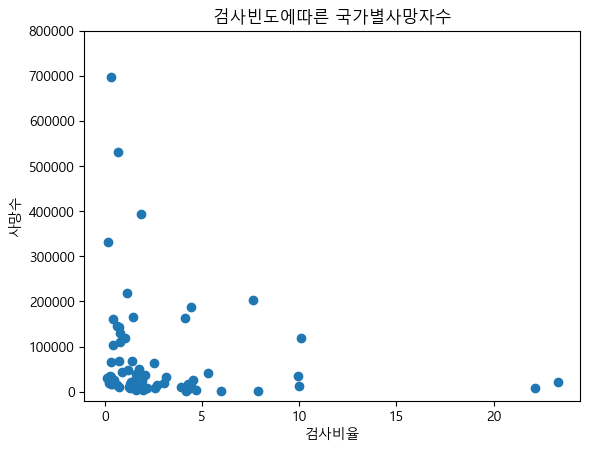

In [19]:
plt.scatter(merged_df['검사비율'], merged_df['사망수'])
plt.title('검사빈도에따른 국가별사망자수')
plt.xlabel('검사비율')
plt.ylabel('사망수')
plt.ylim(-20000,800000)
plt.show()

In [13]:
def zscore(x):
    z = (x - np.mean(x)) / np.std(x)
    return z

In [14]:
merged_df=merged_df.set_index('국가명')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


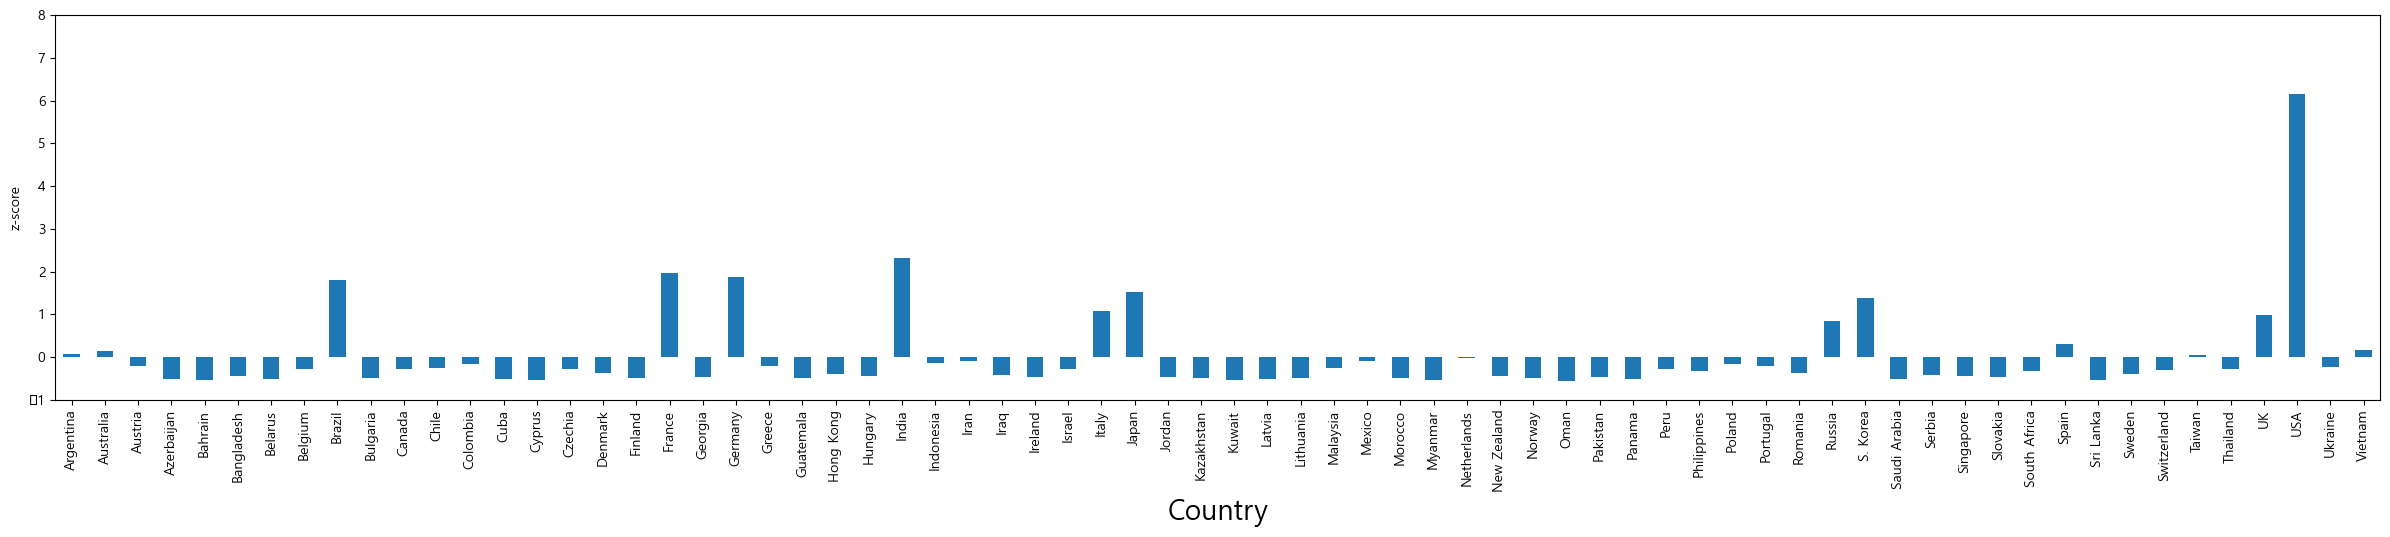

In [15]:


zscore(merged_df['확진수'])

zscore(merged_df['확진수']).plot(kind='bar', figsize=(30, 5))

plt.title('')
plt.xlabel('Country',fontsize=20)
plt.ylabel('z-score')
plt.ylim(-1,8)
plt.show()